# <p style="text-align: center;"> <b> Data Exploration </b></p>

---

---

## 1. IMPORT THƯ VIỆN:

Đây là những thư viện dùng cho Data Exploration:
- `numpy`: used for mathematical operations on matrices
- `pandas`: used to store data from `.csv` files and operate functions on DataFrame
- `matplotlib`: used to visualize data
- `seaborn`: used to visualize data
- `ast`:  used for literal_eval to safely evaluate strings containing Python expressions
- `re`: used for regular expressions to extract, parse, clean strings
- `parse` from `dateutil.parser`: used for parsing date strings
- `datetime` from `datetime`: Provides classes for working with dates and times

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime as dt
import ast
import re

# Disable copy warning
pd.options.mode.chained_assignment = None 

# Disable future warnings and user warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


## 2. TỔNG QUÁT VỀ DỮ LIỆU:

Nhóm sẽ duyệt qua dữ liệu sau khi thực hiện thao tác Data Preprocessing

In [96]:
anime_df = pd.read_csv('./Data Preprocessing/anime-data-preprocessing.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None)  
anime_df.head()

,Name,Score,Genres,Synopsis,Type,Episodes,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members,Released date,Completed date
0,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy","After a horrific alchemy experiment goes wrong in the Elric household, brothers Edward and Alphonse are left in a catastrophic new reality. Ignoring the alchemical principle banning human transmutation, the boys attempted to bring their recently deceased mother back to life. Instead, they suffered brutal personal loss: Alphonse's body disintegrated while Edward lost a leg and then sacrificed an arm to keep Alphonse's soul in the physical realm by binding it to a hulking suit of armor.\n\nThe brothers are rescued by their neighbor Pinako Rockbell and her granddaughter Winry. Known as a bio-mechanical engineering prodigy, Winry creates prosthetic limbs for Edward by utilizing ""automail,"" a tough, versatile metal used in robots and combat armor. After years of training, the Elric brothers set off on a quest to restore their bodies by locating the Philosopher's Stone—a powerful gem that allows an alchemist to defy the traditional laws of Equivalent Exchange.\n\nAs Edward becomes an infamous alchemist and gains the nickname ""Fullmetal,"" the boys' journey embroils them in a growing conspiracy that threatens the fate of the world.",TV,64.0,"Aniplex, Square Enix, Mainichi Broadcasting System, Studio Moriken",Bones,Manga,24.0,R - 17+ (violence & profanity),1,3,217606,2020030,3176556,2009-04-05,2010-07-04
1,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense","Eccentric scientist Rintarou Okabe has a never-ending thirst for scientific exploration. Together with his ditzy but well-meaning friend Mayuri Shiina and his roommate Itaru Hashida, Rintarou founds the Future Gadget Laboratory in the hopes of creating technological innovations that baffle the human psyche. Despite claims of grandeur, the only notable ""gadget"" the trio have created is a microwave that has the mystifying power to turn bananas into green goo.\n\nHowever, when Rintarou decides to attend neuroscientist Kurisu Makise's conference on time travel, he experiences a series of strange events that lead him to believe that there is more to the ""Phone Microwave"" gadget than meets the eye. Apparently able to send text messages into the past using the microwave, Rintarou dabbles further with the ""time machine,"" attracting the ire and attention of the mysterious organization SERN.\n\nDue to the novel discovery, Rintarou and his friends find themselves in an ever-present danger. As he works to mitigate the damage his invention has caused to the timeline, he is not only fighting a battle to save his loved ones, but also one against his degrading sanity.",TV,24.0,"Frontier Works, Media Factory, Kadokawa Shoten, Movic, AT-X, Kadokawa Pictures Japan, Nitroplus",White Fox,Visual novel,24.0,PG-13 - Teens 13 or older,2,13,182964,1336233,2440369,2011-04-06,2011-09-14
2,Bleach: Sennen Kessen-hen,9.07,"Action, Adventure, Fantasy","Substitute Soul Reaper Ichigo Kurosaki spends his days fighting against Hollows, dangerous evil spirits that threaten Karakura Town. Ichigo carries out his quest with his closest allies: Orihime Inoue, his childhood friend with a talent for healing; Yasutora Sado, his high school classmate with superhuman strength; and Uryuu Ishida, Ichigo's Quincy rival.\n\nIchigo's vigilante routine is disrupted by the sudden appearance of Asguiaro Ebern, a dangerous Arrancar who heralds the return of Yhwach, an ancient Quincy king. Yhwach seeks to reignite the historic blood feud between Soul Reaper and Quincy, and he sets his sights on erasing both the human world and the Soul Society for good.\n\nYhwach launches a two-pronged invasion into both the Soul Society and Hueco Mundo, the home of Hollows and Arrancar. In retaliation, Ichigo and his friends must fight alongside old allies and enemies alike to end Yhwach's campaign of carnage befo

### 2.1. CÁC CỘT VÀ CÁC DÒNG

#### 2.1.1 Số dòng và số cột của bộ dữ liệu 

In [97]:
n_rows , n_cols = anime_df.shape
print(f'Có {n_rows} dòng và {n_cols} cột trong bộ dữ liệu')

Có 13834 dòng và 18 cột trong bộ dữ liệu


#### 2.1.2 Ý nghĩa của các hàng và các cột

- Mỗi dòng dữ liệu trong bộ dữ liệu này là dữ liệu về một bộ anime được thu thập trên MyAnimeList vào năm 2023
- Mỗi cột dữ liệu trong bộ dữ liệu này lần lượt có ý nghĩa như sau:

| **CỘT**               |**Ý NGHĨA**               |
|:----------------------|:-------------------------------------------------------------|
|**`Name`**             | Tên của bộ anime                                       |
|**`Score`**            | Điểm trên trang MyAnimeList(MAL)                       |
|**`Genres`**           | Các thể loại của bộ anime                              |
|**`Synopsis`**         | Mô tả hoặc tóm tắt ngắn gọn nội dung của bộ anime      |
|**`Type`**             | Dạng phim của bộ Anime (TV series, Movie, OVA, ...)    |
|**`Episodes`**         | Số lượng tập phim của bộ Anime                         |
|**`Producers`**        | Các công ty sản xuất hoặc nhà sản xuất cho bộ Anime    |
|**`Studios`**          | Các hãng phim Anime đã thực hiện bộ Anime              |
|**`Source`**           | Nguyên tác của bộ Anime (Manga, Light Novel, Original, ...) |
|**`Time per ep (Min)`**| Thời lượng một tập phim của bộ Anime                   |
|**`Rating`**           | Giới hạn độ tuổi xem bộ Anime                          |
|**`Rank`**             | Xếp hạng của bộ Anime                            |
|**`Popularity`**       | Độ phổ biến của bộ Anime                                   |
|**`Favorites`**        | Số lượng người yêu thích bộ Anime               |
|**`Scored By`**        | Số lượng người cho điểm bộ Anime              |
|**`Members`**          | Số lượng thành viên trong hội nhóm của bộ Anime     |
|**`Released date`**    | Ngày phát hành bộ Anime   |
|**`Completed date`**   | Ngày kết thúc bộ Anime   |

### 2.2. SỐ LƯỢNG DÒNG TRÙNG NHAU

Nhóm sẽ kiểm tra trong tập dữ liệu có dòng trùng nhau hay không. Nếu có, thì sẽ tiến hành xóa những dòng trùng đi.

In [98]:
duplicated_rows = anime_df.duplicated().sum()

if duplicated_rows == 0:
    print('Có 0 dòng trùng nhau trong bộ dữ liệu.')
else:
    print(f'Có {duplicated_rows} trùng nhau trong bộ dữ liệu.')
    manga_df = anime_df.drop_duplicates()
    print(f'Sau khi loại bỏ các dòng trùng nhau, bộ dữ liệu còn {manga_df.shape[0]} dòng.')

Có 0 dòng trùng nhau trong bộ dữ liệu.


Điều này cho nhóm thấy rằng bộ dữ liệu được xử lý tốt, không có dòng nào trùng nhau trong bộ dữ liệu.

### 2.3. KIỂU DỮ LIỆU CỦA CÁC THUỘC TÍNH

#### 2.3.1. Kiểm tra kiểu dữ liệu hiện tại của các thuộc tính

Nhóm sẽ kiểm tra các kiểu dữ liệu của các thuộc tính để nhận biết tính đúng sai của các thuộc tính, đồng thời thay đổi kiểu dữ liệu của thuộc tính nếu cần thiết

In [99]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               13834 non-null  object 
 1   Score              13834 non-null  float64
 2   Genres             13834 non-null  object 
 3   Synopsis           13834 non-null  object 
 4   Type               13834 non-null  object 
 5   Episodes           13834 non-null  float64
 6   Producers          13834 non-null  object 
 7   Studios            13834 non-null  object 
 8   Source             13834 non-null  object 
 9   Time per ep (Min)  13834 non-null  float64
 10  Rating             13834 non-null  object 
 11  Rank               13834 non-null  int64  
 12  Popularity         13834 non-null  int64  
 13  Favorites          13834 non-null  int64  
 14  Scored By          13834 non-null  int64  
 15  Members            13834 non-null  int64  
 16  Released date      138

Để nắm rõ hơn các cột dữ liệu có dạng `object`, chúng ta se phân tích chúng bằng cách xử dụng hàm `open_object_dtype()`

In [100]:
def open_object_dtype(s):
    dtypes = set()
    dtypes.update(s.apply(type))
    return list(dtypes)

open_type = anime_df.apply(open_object_dtype, axis=0)
for col, types in open_type.items():
    print(f"{col:<30} {', '.join(map(str, types))}")

Name                           <class 'str'>
Score                          <class 'float'>
Genres                         <class 'str'>
Synopsis                       <class 'str'>
Type                           <class 'str'>
Episodes                       <class 'float'>
Producers                      <class 'str'>
Studios                        <class 'str'>
Source                         <class 'str'>
Time per ep (Min)              <class 'float'>
Rating                         <class 'str'>
Rank                           <class 'int'>
Popularity                     <class 'int'>
Favorites                      <class 'int'>
Scored By                      <class 'int'>
Members                        <class 'int'>
Released date                  <class 'str'>
Completed date                 <class 'str'>


Nhóm sẽ đánh giá các kiểu dữ liệu của các thuộc tính trong bộ dataset như sau:
- Các thuộc tính có kiểu dữ liệu phù hợp: `Name`, `Score`, `Genres`, `Synopsis`, `Type`, `Episodes`, `Producers`, `Studios`, `Source`, `Time per ep (Min)`,	`Rating`, `Rank`, `Popularity`, `Favorites`, `Scored By`, `Members`
- Các thuộc tính cần chuyển sang kiểu dữ liệu khác: `Released date`, `Completed date`

Xem xét qua bộ dữ liệu này, nhóm nhận thấy rằng:
- Thuộc tính `Released date` có thể chuyển sang được `datetime64` do toàn bộ các dòng trong cột dữ liệu này đều là dữ liệu ngày, tháng, năm.
- Thuộc tính `Completed date` nên giữ lại kiểu dữ liệu `str` do trong cột dữ liệu này có một vài dữ liệu có giá trị **Updating**. Có thể chuyển dữ liệu cột này sang `datetime64` trong các trường hợp đặc thù, khi không cần xét các giá trị **Updating** 

In [101]:
# Chỉ lấy hai cột cần thiết
columns_to_check = ["Released date", "Completed date"]

# Đếm số lượng "Updating" trong từng cột được chọn
updating_count = (anime_df[columns_to_check] == 'Updating').sum()

# Xem kết quả
print("Số lượng 'UNKNOWN' hoặc 'Unknown' trong từng cột:")
print(updating_count)

Số lượng 'UNKNOWN' hoặc 'Unknown' trong từng cột:
Released date       0
Completed date    107
dtype: int64


#### 2.3.2. Thay đổi kiểu dữ liệu các thuộc tính

Nhóm sẽ chuyển kiểu dữ liệu của `Released date` từ `str` sang `datetime64`

In [102]:
anime_df['Released date'] = pd.to_datetime(anime_df['Released date'], errors='coerce').dt.normalize()

Kiểm tra lại kiểu dữ liệu của `Released date`

In [103]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               13834 non-null  object        
 1   Score              13834 non-null  float64       
 2   Genres             13834 non-null  object        
 3   Synopsis           13834 non-null  object        
 4   Type               13834 non-null  object        
 5   Episodes           13834 non-null  float64       
 6   Producers          13834 non-null  object        
 7   Studios            13834 non-null  object        
 8   Source             13834 non-null  object        
 9   Time per ep (Min)  13834 non-null  float64       
 10  Rating             13834 non-null  object        
 11  Rank               13834 non-null  int64         
 12  Popularity         13834 non-null  int64         
 13  Favorites          13834 non-null  int64         
 14  Scored

## 3. DATA DISTRIBUTION

Nhóm sẽ phân tích phân phối của các cột theo từng nhóm thuộc tính:
- Nhóm thuộc tính Numeric: Score, Episodes, Time per ep (Min), Rank, Popularity, Favourites, Scored By, Members
- Nhóm thuộc tính Datetime: Released date, Completed date
- Nhóm thuộc tính Category: Name, Genres, Synopsis, Type, Producers, Studios, Source, Rating

### 3.1. NHÓM THUỘC TÍNH NUMERICAL:

Các cột có kiểu dữ liệu Numeric bao gồm

| **CỘT**               |**KIỂU DỮ LIỆU**               |
|:----------------------|:-------------------------------------------------------------|
|**`Score`**            | float64                      |
|**`Episodes`**         | float64                        |
|**`Time per ep (Min)`**| float64                   |
|**`Rank`**             | int64                            |
|**`Popularity`**       | int64                                  |
|**`Favorites`**        | int64               |
|**`Scored By`**        | int64              |
|**`Members`**          | int64     |

#### 3.1.1. Tính toán thống kê

In [104]:
numeric_cols = anime_df.select_dtypes(exclude=['object', 'datetime64[ns]']).columns
num_col_dist_df = anime_df[numeric_cols].copy()
missing_percentage = num_col_dist_df.isna().mean() * 100

num_col_dist_df = num_col_dist_df.describe(percentiles=[.25, .5, .75]).round(2)
num_col_dist_df.loc['missing ratios'] = missing_percentage
num_col_dist_df

,Score,Episodes,Time per ep (Min),Rank,Popularity,Favorites,Scored By,Members
count,13834.00,13834.00,13834.00,13834.00,13834.00,13834.00,13834.00,13834.00
mean,6.45,11.89,26.63,6917.50,7520.57,773.68,33817.13,65718.56
std,0.93,46.40,25.48,3993.68,4620.37,5818.03,124017.76,205843.70
min,1.85,1.00,0.10,1.00,1.00,0.00,100.00,180.00
25%,5.83,1.00,10.00,3459.25,3544.25,2.00,528.25,1644.25
50%,6.47,2.00,24.00,6917.50,7289.00,10.00,2339.50,6300.00
75%,7.13,12.00,27.00,10375.75,11212.75,81.00,14323.75,34609.75
max,9.10,3057.00,168.00,13834.00,19191.00,217606.00,2660903.00,3744541.00
missing ratios,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


**Nhận xét**

1. **Đánh giá chung:**
- Tỉ lệ dữ liệu bị thiếu: Bộ dữ liệu đã được xử lý tốt, cho nên tất cả các cột dữ liệu thuộc nhóm Numerical không bị thiếu dữ liệu (missing ratios = 0%)
- Các giá trị **min**, **median** (50%), **lower quartile** (25%), **upper quartile** (75%) and **max**:
  - **Số lượng quan sát (count):** Tất cả các cột đều có số lượng đầy đủ (13834), không có giá trị thiếu (missing ratios = 0.00).
  - **Điểm trung bình (mean):** Điểm trung bình (Score) là **6.45**, cho thấy đa số anime có chất lượng ở mức trung bình khá.
  - **Tổng số tập (Episodes):** Số tập trung bình là **11.89**, tuy nhiên giá trị **std (46.40)** cho thấy có sự phân tán lớn, có thể do một số anime có số tập rất cao (tối đa là **3057 tập**).
  - **Thời lượng mỗi tập (Time per ep):** Thời lượng trung bình mỗi tập là **26.63 phút**, phù hợp với thời lượng thường thấy của các tập anime.

2. **Đánh giá từng thuộc tính**
- **Score (Điểm số)**
  - Phân phối điểm có giá trị tối thiểu là **1.85** và tối đa là **9.10**. 
  - Trung bình (**mean**) là **6.45**, với **std = 0.93**, cho thấy các điểm số chủ yếu nằm trong khoảng từ 5.52 đến 7.38 (± 1 độ lệch chuẩn).

- **Episodes (Số tập)**
  - **Median (50%):** **2 tập**, chỉ ra rằng nhiều anime là ngắn hạn hoặc có ít tập (OVA, phim lẻ).
  - **Max (3057 tập):** Đây có thể là các anime dài kỳ như *Sazae-san* hoặc *Doraemon*.
  - **std = 46.40** rất lớn so với **mean = 11.89**, do sự chênh lệch lớn giữa các anime ngắn và dài.

- **Time per ep (Thời lượng mỗi tập)**
  - Thời lượng tối thiểu (**min**) là **0.1 phút**, có thể là lỗi dữ liệu hoặc một số clip rất ngắn.
  - Phân vị thứ 75 (**75%**) là **27 phút**, tức là đa số các tập có thời lượng phổ biến trong khoảng từ 24-27 phút.

- **Rank (Xếp hạng)**
  - Giá trị **mean = 6917.50** cho thấy đa số anime thuộc nhóm trung bình hoặc thấp hơn về xếp hạng.
  - **Min = 1:** Đây là những anime có xếp hạng cao nhất.
  - **Max = 13834:** Là anime có xếp hạng thấp nhất trong tập dữ liệu này.

- **Popularity (Mức độ phổ biến)**
  - Trung bình **7520.57**, với **min = 1** và **max = 19191**. Các giá trị này phản ánh rằng anime rất phổ biến sẽ có nhiều người biết đến hơn hẳn.

- **Favorites (Số yêu thích)**
  - **mean = 773.68**, nhưng giá trị **std = 5818.03** rất cao, cho thấy có sự phân tán lớn. Một số anime có lượng yêu thích vượt trội (**max = 217606**) trong khi nhiều anime có số yêu thích rất thấp (**25% = 2**).

- **Scored By (Số người chấm điểm)**
  - Giá trị trung bình **33817.13**, tuy nhiên có một số anime rất nổi bật với **max = 2660903** lượt chấm điểm.
  - Đa số anime nhận được ít hơn **14323.75** lượt chấm điểm (75%).

- **Members (Số thành viên)**
  - Số lượng thành viên trung bình là **65718.56**, nhưng giá trị phân tán rất lớn (**std = 205843.70**). Một số anime có số lượng thành viên vượt trội (**max = 3744541**).

#### 3.1.2. Xem xét các thuộc tính

**`Score` & `Popularity`**

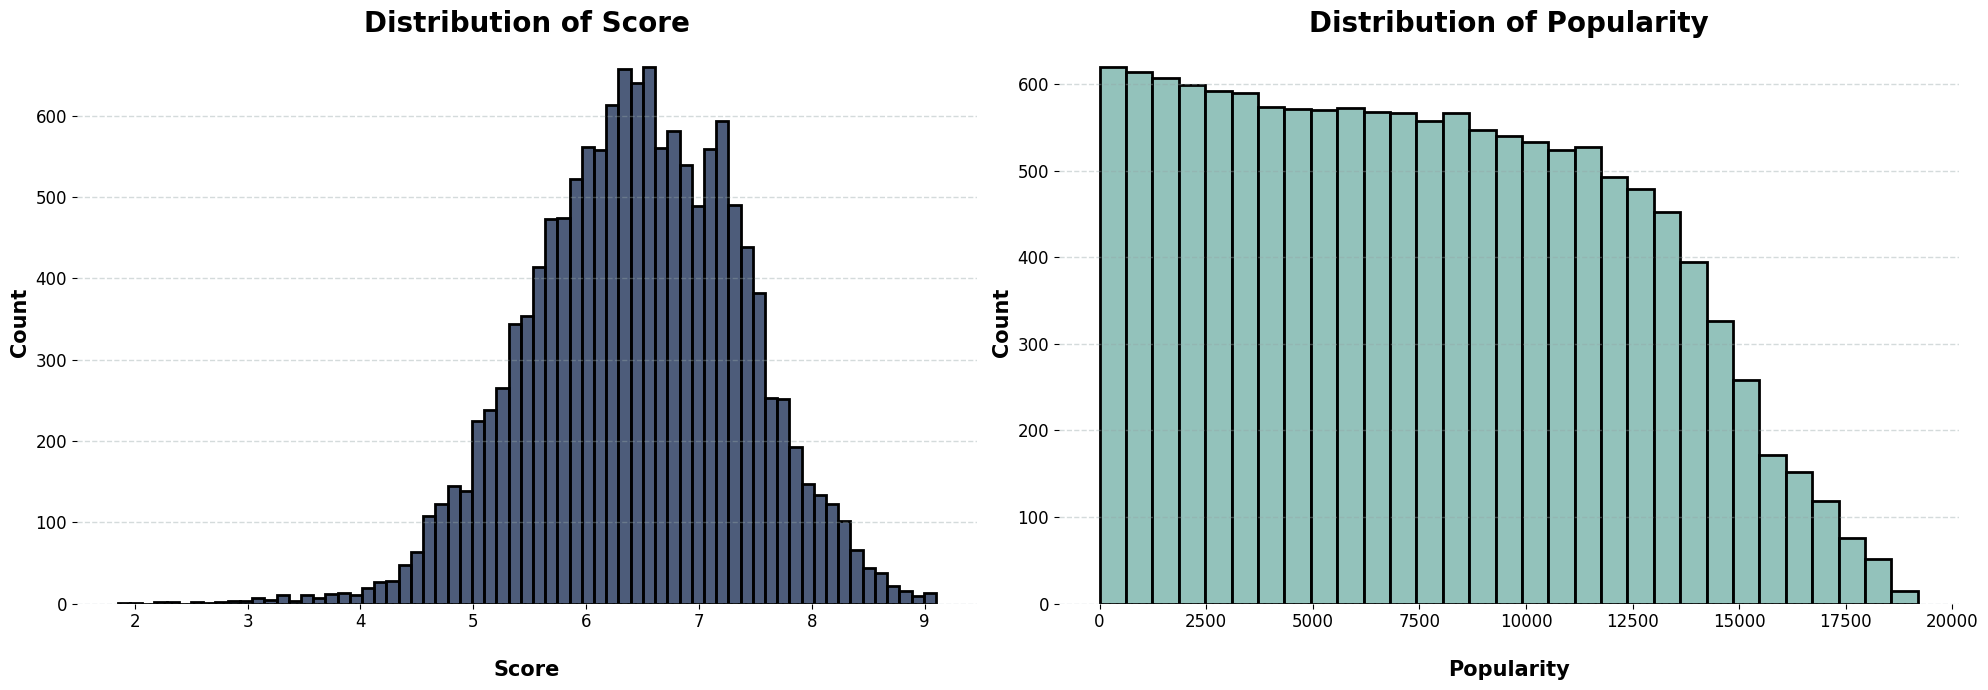

In [105]:
col = ['Score', 'Popularity']
color = ["#11264e","#6faea4"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

for i in range(2):
    p = sns.histplot(data=anime_df[col[i]], ax=ax[i], color=color[i], linewidth=2)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=20, color='k', weight='bold')
    p.axes.set_xlabel(f"\n{col[i]}",fontsize=15, weight='bold')
    p.axes.set_ylabel('Count',fontsize=15, weight='bold')
    p.axes.tick_params(labelsize=12)
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

**Nhận xét**

1. **Phân phối của Score**
- Biểu đồ cho thấy **phân phối đối xứng** với dạng gần giống **phân phối chuẩn**.
- **Trung tâm của phân phối**:
  - Điểm số phổ biến nhất rơi vào khoảng từ **6.0 đến 7.0** (đỉnh của biểu đồ).
  - Điều này phù hợp với giá trị trung bình **6.45** được báo cáo trước đó.
- **Đuôi (tail):**
  - Biểu đồ có đuôi trái kéo dài về các giá trị thấp (khoảng từ 2 đến 5), nhưng tần suất thấp hơn nhiều.
  - Tương tự, đuôi phải kéo dài đến điểm số cao hơn (khoảng 8-9).
- **Độ phân tán:**
  - Biểu đồ tương đối hẹp, cho thấy phần lớn các anime có điểm số tập trung quanh giá trị trung bình, với một số ít rơi vào các điểm số rất thấp hoặc rất cao.

2. **Phân phối của Popularity**
- Biểu đồ này hiển thị **phân phối lệch phải**.
- **Phân bố:**
  - Đa số anime có độ phổ biến thấp hơn (ở bên trái biểu đồ, từ 0 đến khoảng 10,000), với tần suất giảm dần.
  - Tần suất giảm nhanh sau khoảng **15,000** và gần như bằng 0 khi độ phổ biến lớn hơn **18,000**.
- **Dạng lệch phải:**
  - Điều này cho thấy chỉ một số ít anime có mức độ phổ biến rất cao (các giá trị cao ở đuôi bên phải).

**Kết luận:**
Điểm số của anime có xu hướng tập trung ở mức trung bình hoặc khá, với ít trường hợp có điểm rất thấp hoặc rất cao. Hầu hết các anime có mức độ phổ biến ở mức trung bình hoặc thấp, trong khi chỉ một số ít anime đạt mức độ phổ biến rất lớn.

**`Episodes`** và **`Time per ep (Min)`**

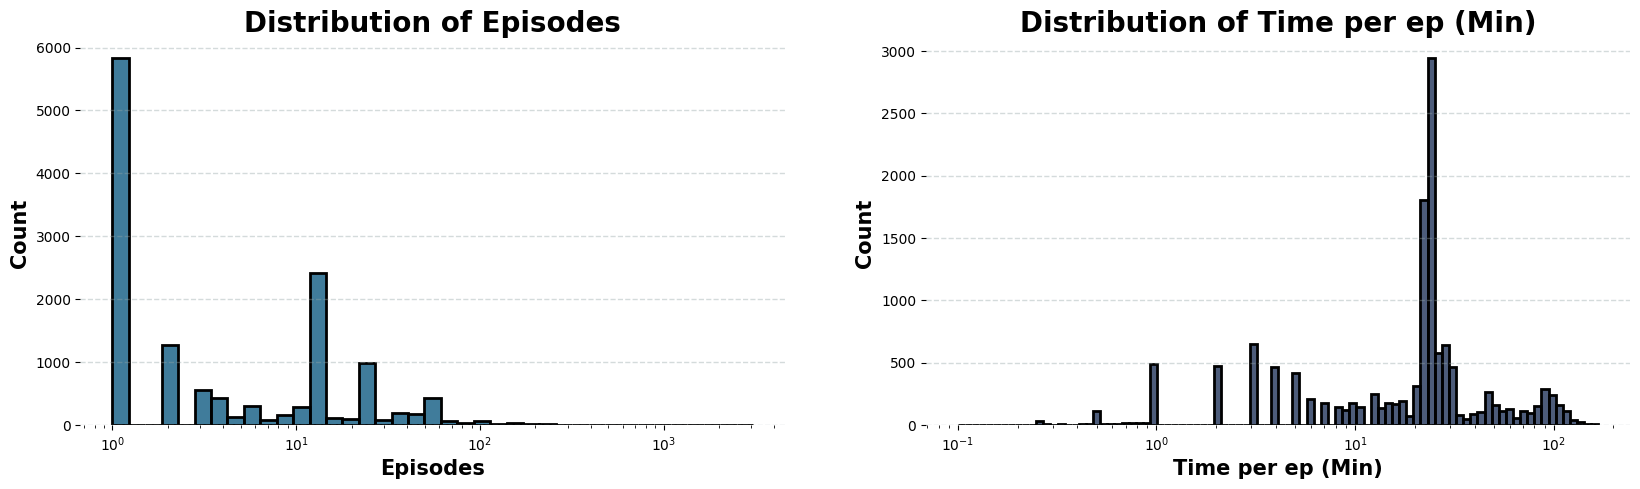

In [106]:
col = ['Episodes','Time per ep (Min)']
color = ["#00507A","#11264e"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for i in range(2):
    p = sns.histplot(data=anime_df[col[i]], ax=ax[i], color=color[i], linewidth=2, log_scale=True)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=20, color='k', weight='bold')
    p.axes.set_xlabel(f"{col[i]}",fontsize=15, weight='bold')
    p.axes.set_ylabel('Count',fontsize=15, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
sns.despine(left=True, bottom=True)

**Nhận xét**

1. **Phân phối của Episodes**
  - Đa số các mẫu có số lượng tập rất thấp (khoảng 1 tập), thể hiện qua cột đầu tiên rất cao.
  - Một số ít mẫu có số lượng tập trung bình (10 - 100 tập), với mức giảm dần ở các bậc log.
  - Có một số mẫu với số tập cực kỳ lớn (>1000), nhưng số lượng những mẫu này rất nhỏ.
  - Biểu đồ này cho thấy số tập phim thường không phân bổ đều mà có xu hướng tập trung nhiều ở mức thấp.

2. **Phân phối thời gian mỗi tập**
  - Thời gian mỗi tập phim phổ biến nhất là khoảng 10 - 20 phút (biểu diễn qua cột cao nhất).
  - Có sự hiện diện của các mẫu có thời gian mỗi tập rất ngắn (<1 phút) và rất dài (>100 phút), nhưng số lượng này rất nhỏ.
  - Phân phối nghiêng về các khoảng thời gian trung bình, với nhiều đỉnh nhỏ hơn ở các khoảng khác.

**Kết luận**:
- Cả hai biểu đồ đều sử dụng thang đo log trên trục hoành để thể hiện rõ hơn sự phân bổ dữ liệu không đồng đều.
- Phân phối trong cả hai trường hợp đều nghiêng về các giá trị thấp (số tập hoặc thời gian mỗi tập ngắn).
- Biểu đồ này phù hợp để phân tích xu hướng trong ngành công nghiệp phim/series (ví dụ: các tập phim ngắn hơn và số lượng tập ít phổ biến hơn). 

**`Scored by`**, **`Members`**, **`Favorites`** and **`Rank`**

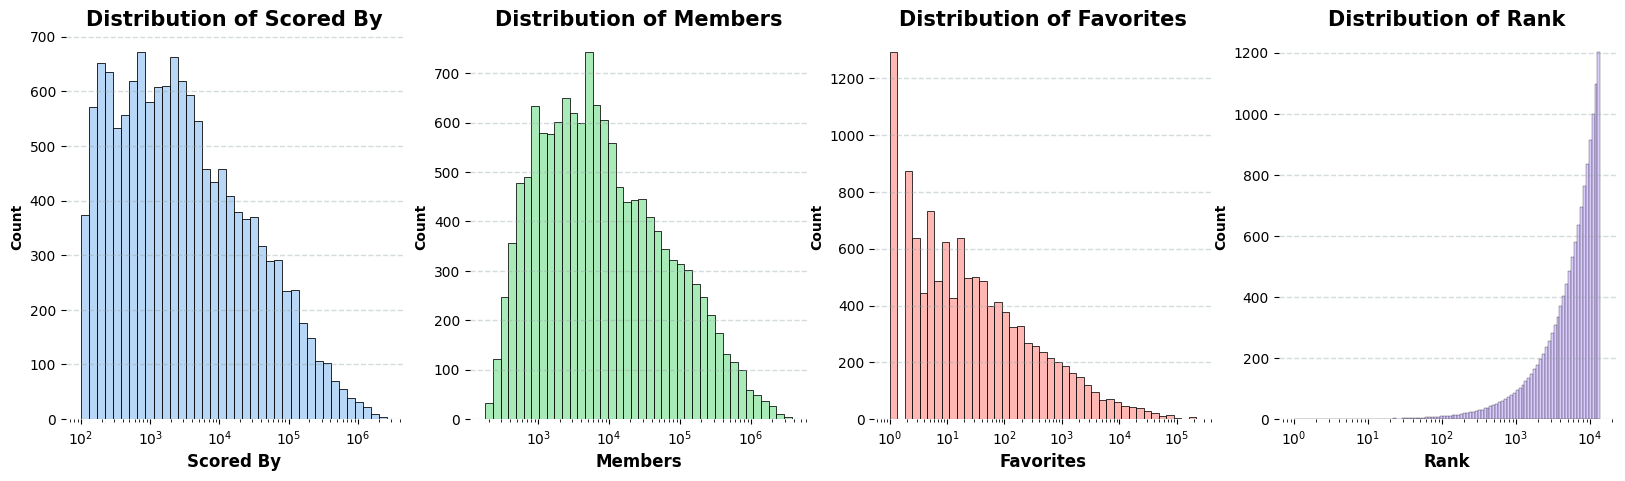

In [107]:
col = ['Scored By','Members','Favorites','Rank']
color = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

for i in range(4):
    p = sns.histplot(data=anime_df[col[i]], ax=ax[i], color=color[i], log_scale=True)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=15, color='k', weight='bold')
    p.axes.set_xlabel(f"{col[i]}",fontsize=12, weight='bold')
    p.axes.set_ylabel('Count',fontsize=10, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
sns.despine(left=True, bottom=True)

**Nhận xét**

**1. Phân phối của Scored By**
  - Số lượng anime được ít người đánh giá (khoảng 100-1,000 người) khá cao.
  - Có xu hướng giảm dần về số lượng khi số người đánh giá tăng.
  - Một số anime rất nổi bật có số lượng người đánh giá cao (trên 1 triệu), nhưng số này rất ít.

**2. Phân phối của Members**
  - Phân phối gần giống hình chuông với đỉnh tại khoảng 10,000-30,000 thành viên.
  - Số lượng anime có ít hơn 1,000 thành viên hoặc nhiều hơn 100,000 thành viên giảm mạnh.
  - Điều này cho thấy phần lớn anime có độ phổ biến trung bình.

**3. Distribution of Favorites**
  - Phần lớn anime có rất ít người yêu thích (dưới 10 người), với cột đầu tiên vượt trội.
  - Số lượng anime giảm mạnh khi số lượng người yêu thích tăng.
  - Một số anime nổi bật với hơn 1,000 người yêu thích, nhưng rất ít.

**4. Distribution of Rank**
  - Phần lớn anime có thứ hạng thấp (gần 10,000), thể hiện qua cột cao nhất ở cuối biểu đồ.
  - Số lượng anime giảm dần khi thứ hạng tăng (hạng càng tốt).
  - Điều này phản ánh rằng chỉ có một số ít anime đạt được vị trí cao trên bảng xếp hạng.

---

**Kết luận**

1. **Scored By và Members:**
   - Hai yếu tố này có mối quan hệ chặt chẽ. Anime có nhiều thành viên thường sẽ có nhiều người đánh giá, vì đây là những anime phổ biến hơn.
   - Tuy nhiên, một số anime có thể có nhiều thành viên nhưng ít người đánh giá (do tính chất cụ thể hoặc mức độ thu hút khác nhau).

2. **Scored By và Favorites:**
   - Anime có nhiều người đánh giá thường có khả năng có nhiều người yêu thích hơn, nhưng mối quan hệ này không hoàn toàn tỷ lệ thuận. Một anime có thể được nhiều người xem nhưng ít yêu thích (ví dụ: không nổi bật về chất lượng).

3. **Favorites và Rank:**
   - Số lượng người yêu thích có thể ảnh hưởng đến thứ hạng. Anime được yêu thích nhiều có khả năng có thứ hạng cao hơn, nhưng thứ hạng còn phụ thuộc vào các yếu tố khác như điểm số trung bình.

4. **Members và Rank:**
   - Anime với nhiều thành viên thường có xu hướng xếp hạng cao hơn, nhưng điều này không tuyệt đối. Một anime có thể phổ biến nhưng không được đánh giá tốt, dẫn đến thứ hạng thấp.

### 3.2. Nhóm các thuộc tính Datetime

Các cột dữ liệu Datetime bao gồm:

| **CỘT**               |**KIỂU DỮ LIỆU**               |
|:----------------------|:-------------------------------------------------------------|
|**`Released date`**            | datetime64[ns]                      |
|**`Completed date`**         | object                        |

Đây là hai thuộc tính dữ liệu đặc biệt, có mối liên hệ với nhau. Nhưng hai thuộc tính này trong bộ dữ liệu có kiểu dữ liệu lần lượt là `datetime64[ns]` và `object`, cho nên nhóm quyết định xử lý, tìm hiểu và đưa ra nhận xét riêng về mối quan hệ giữa hai thuộc tính dữ liệu này.

In [108]:
updating_count = (anime_df['Completed date'] == 'Updating').sum()
print(f"Số lượng bộ có Released date ở tình trạng 'Updating': {updating_count}")

Số lượng bộ có Released date ở tình trạng 'Updating': 107


Để có thể trực quan hóa biểu đồ cho các thuộc tính này, nhóm sẽ đổi các dữ liệu có giá trị là **Updating** trong cột `Completed date` thành một ngày cụ thể là ngày kết thúc đồ án (**16/12/2024**)

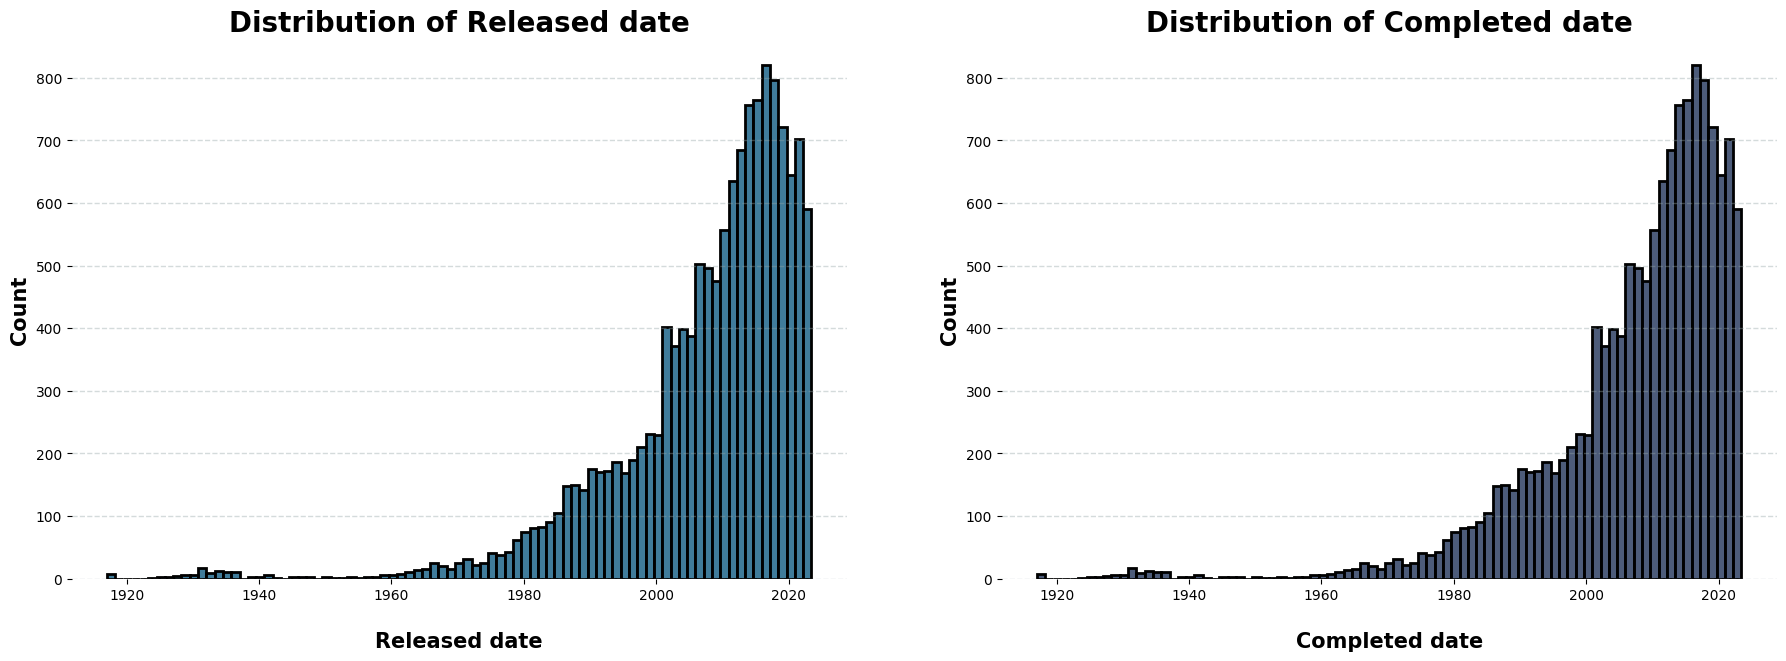

In [109]:
# Chuyển đổi giá trị "Updating" thành ngày cụ thể - Ngày 16/11/2024 (Ngày hoàn thành đồ án)
# Mục đích nhằm trực quan hóa không bị báo lỗi 
# Failed to convert value(s) to axis units: ['Updating']
date_anime_df = anime_df.copy()

date_anime_df['Completed date'] = date_anime_df['Completed date'].replace("Updating", "2024-12-16")

# Đảm bảo cột có định dạng ngày
date_anime_df['Completed date'] = pd.to_datetime(date_anime_df['Released date'], errors='coerce')

col = ['Released date', 'Completed date']
color = ["#00507A","#11264e"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 7))

for i in range(2):
    p = sns.histplot(data=date_anime_df[col[i]], ax=ax[i], color=color[i], linewidth=2)
    p.axes.set_title(f"Distribution of {col[i]}",fontsize=20, color='k', weight='bold')
    p.axes.set_xlabel(f"\n{col[i]}",fontsize=15, weight='bold')
    p.axes.set_ylabel('Count',fontsize=15, weight='bold')
    p.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.4)
sns.despine(left=True, bottom=True)

**Nhận xét**

1. **Phân phối Released date**
  - Từ 1920 đến khoảng 1960, số lượng anime phát hành rất ít, thể hiện sự sơ khai của ngành công nghiệp này.
  - Từ 1980 trở đi, số lượng anime tăng đáng kể, đặc biệt từ những năm 2000 với mức tăng trưởng mạnh.
  - Đỉnh cao nhất nằm trong khoảng 2010-2020, cho thấy đây là thời kỳ hoàng kim của ngành công nghiệp anime, với nhiều tựa phim được phát hành mỗi năm.

2. **Phân phối Completed date**
  - Phân phối này tương tự như biểu đồ ngày phát hành, với xu hướng tăng trưởng rõ ràng từ 1980 và đạt đỉnh vào khoảng 2010-2020.
  - Số lượng anime hoàn thành trước năm 1980 rất ít, phản ánh sự phát triển chậm của ngành trong giai đoạn này.
  - Sự giảm nhẹ sau năm 2020 có thể do dữ liệu chưa đầy đủ hoặc tác động từ các yếu tố như đại dịch toàn cầu.

---

**Kết luận**

1. **Tương đồng về xu hướng:**
   - Cả hai biểu đồ đều cho thấy số lượng anime tăng trưởng mạnh từ những năm 1980 và đạt đỉnh vào giai đoạn 2010-2020.
   - Điều này cho thấy sự phát triển đồng thời về sản xuất và hoàn thành anime, phản ánh nhu cầu cao và sự phát triển của công nghệ, đội ngũ sản xuất.

2. **Mối quan hệ phát hành và hoàn thành:**
   - Ngày phát hành và ngày hoàn thành thường gần nhau, đặc biệt đối với anime có thời lượng ngắn (phim lẻ hoặc series ngắn). Do đó, phân phối của hai biểu đồ gần như tương đồng.
   - Tuy nhiên, một số anime dài hơi (như series kéo dài nhiều năm) có thể dẫn đến khoảng cách giữa ngày phát hành và hoàn thành, nhưng không đáng kể trong xu hướng tổng thể.

3. **Ngành công nghiệp anime:**
   - Giai đoạn tăng trưởng mạnh từ 2000 đến 2020 thể hiện sự bùng nổ của ngành công nghiệp anime, bao gồm cả sản xuất và phát hành.
   - Số lượng phát hành và hoàn thành giảm nhẹ sau 2020 có thể do ảnh hưởng của dịch COVID-19 làm chậm tiến độ sản xuất hoặc phát hành.

### 3.1. NHÓM THUỘC TÍNH CATEGORY:

Các cột có kiểu dữ liệu non-numeric bao gồm

| **CỘT**               |**KIỂU DỮ LIỆU**               |
|:----------------------|:-------------------------------------------------------------|
|**`Name`**            | object                      |
|**`Genres`**         | object                        |
|**`Synopsis`**| object                   |
|**`Type`**             | object                            |
|**`Producers`**       | object                                  |
|**`Studios`**        | object               |
|**`Source`**        | object              |
|**`Rating`**          | object     |

Với mỗi cột có kiểu dữ liệu non-numeric, chúng ta sẽ xét các câu hỏi sau:
- Tỷ lệ phần trăm các giá trị bị thiếu là bao nhiêu?
- Có bao nhiêu giá trị khác nhau?
- Chúng có bất thường không?
- Phân phối của mỗi cột 

**Xem xét các thuộc tính có kiểu dữ liệu là string: `Name`, `Type`, `Studios`, `Source`, `Rating`** 

In [112]:
str_col_dist_df = pd.DataFrame({'Name': [.0] * 3,
                                'Type': [.0] * 3,
                                'Studios': [.0] * 3,
                                'Source': [.0] * 3,
                                'Rating': [.0] * 3,
                                },
                                index=['Missing_ratio', 'Num_diff_vals', 'Distribution'], dtype=object)

str_col_dist_df.loc['Num_diff_vals'] = anime_df[str_col_dist_df.columns].nunique()
str_col_dist_df.loc['Distribution'] = anime_df[str_col_dist_df.columns].apply(lambda col: col.value_counts().to_dict())
str_col_dist_df.loc['Missing_ratio'] = (anime_df[['Name', 'Type', 'Studios', 'Source', 'Rating']] == '').sum() / anime_df.shape[0] * 100
str_col_dist_df

,Name,Type,Studios,Source,Rating
Missing_ratio,0.0,0.0,0.0,0.0,0.0
Num_diff_vals,13834,6,1298,17,6
Distribution,"{'Fullmetal Alchemist: Brotherhood': 1, 'Mofa Ya Ma': 1, 'Tales of the Rays Gekijou': 1, 'Mahou no Star Magical Emi: Kumo Hikaru': 1, 'Shi Zhi Ge: Hua Yu Yan De Kuangxiang Shi': 1, 'Lupin III x McDonald's CMs': 1, 'Tiger Mask Fuku Men League Sen': 1, 'Saikyou Donbei x Hanma Baki: Saikyou no Dongitsune Genrutsutsu': 1, 'Jean Valjean Monogatari': 1, 'Urashimasakatasen no Nichijou Special': 1, 'Wangu Jian Shen': 1, 'AOTU Shijie 2': 1, 'Pokemon Sun & Moon Planetarium': 1, 'Noctambulist': 1, 'Licca-chan Fushigi na Fushigi na Yunia Monogatari': 1, 'Bucchigiri': 1, 'Saezuru Doubutsu wa Yarushikanai! Specials': 1, 'Boruto: Naruto Next Generations': 1, '11eyes': 1, 'Platinum End': 1, 'Luck & Logic': 1, 'Gunslinger Stratos The Animation': 1, 'Bem': 1, 'Quiz Magic Academy: The Original Animation': 1, 'Youma': 1, 'Namu Amida Butsu! Rendai Utena': 1, 'Yatterman the Movie: Shin Yattermecha Osu Gou! Omocha no Kuni de Dai Ketsudan da Koron': 1, 'Kurumiwari Ningyou': 1, 'Wo Qi Ku Le Baiwan Xiulian Zhe': 1, 'Genei Toushi Bastof Lemon': 1, 'Hakujaden': 1, 'Softenni Specials': 1, 'Dark Shell: Ori no Naka no Namameki': 1, 'Yutori-chan': 1, 'Choujuu Densetsu Gestalt': 1, 'Kaze no Matasaburou (Movie)': 1, 'Kyokou Uranai': 1, 'Robot Girls Z Episode 0': 1, 'Buddy Go! 2': 1, 'Teakamamire no Tenshi The Animation': 1, 'Toki no Tabibito: Time Stranger': 1, 'Oni-Tensei': 1, 'Toki no Kousa': 1, 'Soba e': 1, 'Shounen Ashibe: Go! Go! Goma-chan': 1, 'Inazuma Eleven x Kaitou Gru no Tsuki Dorobou': 1, 'Pia Carrot e Youkoso!! 2': 1, 'The Four Seasons': 1, 'Line Novel': 1, 'Kirameki☆Project': 1, 'Hensuki▽': 1, 'Kujiratori': 1, 'Shin Koihime†Musou OVA Omake': 1, 'Urashimasakatasen no Nichijou': 1, 'Koukai Benjo The Animation': 1, 'Seikaisuru Kado: Ekwari': 1, 'Jewelpet Movie: Sweets Dance Princess': 1, 'Attack No.1: Namida no Sekai Senshuken': 1, 'Qin Shi Mingyue 3D: Dianying Longteng Wanli': 1, 'Nono-chan': 1, 'DS Anime Soushuuhen '98': 1, 'Sazanami Soushi ni Junketsu wo Sasagu': 1, 'Shouxi Yu Ling Shi 2': 1, 'Meitantei Conan: Kodai Kyouryuu no Nazo ni Semare!': 1, 'Omoide wa Kireide': 1, 'Anata no Koe': 1, 'Noramimi': 1, 'Tottoko Hamtarou no Tottoko Daijida!! Bousai Kunren': 1, 'Kuruneko: Nyaalock Holmes no Bouken': 1, 'Bokura no Yoake': 1, 'Manga Doushite Monogatari': 1, 'Sore Ike! Anpanman: Tenohira wo Taiyou ni': 1, 'DRAMAtical Murder': 1, 'Valkyrie Drive: Mermaid': 1, 'Blade & Soul': 1, 'Asa made Jugyou Chu!': 1, 'Tsuujou Kougeki ga Zentai Kougeki de Ni-kai Kougeki no Okaasan wa Suki desu ka? Namiuchigiwa no Okaasan wa Suki desu ka?': 1, 'DRAMAtical Murder: Data_xx_Transitory': 1, 'Flying Witch Petit': 1, 'Shounen Hollywood: Holly Stage for 49': 1, 'Otome Game no Hametsu Flag shika Nai Akuyaku Reijou ni Tensei shiteshimatta... Voice Drama': 1, 'Uchuujin Tanaka Tarou': 1, 'Ikenai Koto The Animation': 1, 'Himitsukessha Taka no Tsume': 1, 'Koisuru Asteroid: Furikaeri - KiraKira Special!': 1, 'Cosplay Roshutsu Kenkyuukai': 1, 'Madan no Ou to Vanadis: Tigre-kun to Vanadi-chu Episode 0': 1, 'Nineteen 19': 1, 'Houkago 2: Sayuri': 1, 'Votoms Finder': 1, 'Konbini Shoujo Z': 1, 'Tattoon Master': 1, 'Kisaku Spirit': 1, 'Angel Blade: Ultimate Edition - Tokuteneizou': 1, 'Yurumates 3D OVA': 1, 'Tokyo Disney Resort: Yume ga Kanau Basho': 1, 'Panda-Z: The Robonimation': 1, 'Anju to Zushioumaru': 1, 'Bakukyuu Hit! Crash B-Daman': 1, 'Sacred Seven: Shirogane no Tsubasa Picture Drama': 1, ...}","{'TV': 4305, 'OVA': 3203, 'Movie': 2267, 'Special': 1903, 'ONA': 1755, 'Music': 401}","{'UNKNOWN': 2345, 'Toei Animation': 667, 'Sunrise': 465, 'J.C.Staff': 351, 'Madhouse': 316, 'TMS Entertainment': 262, 'Studio Deen': 259, 'Production I.G': 243, 'Pierrot': 230, 'OLM': 222, 'A-1 Pictures': 203, 'Shin-Ei Animation': 165, 'Nippon Animation': 161, 'AIC': 145, 'Bones': 132, 'T-Rex': 127, 'Tatsunoko Production': 126, 'Gonzo': 118, 'Xebec': 116, 'Shaft': 113, 'Kyoto Animation': 1

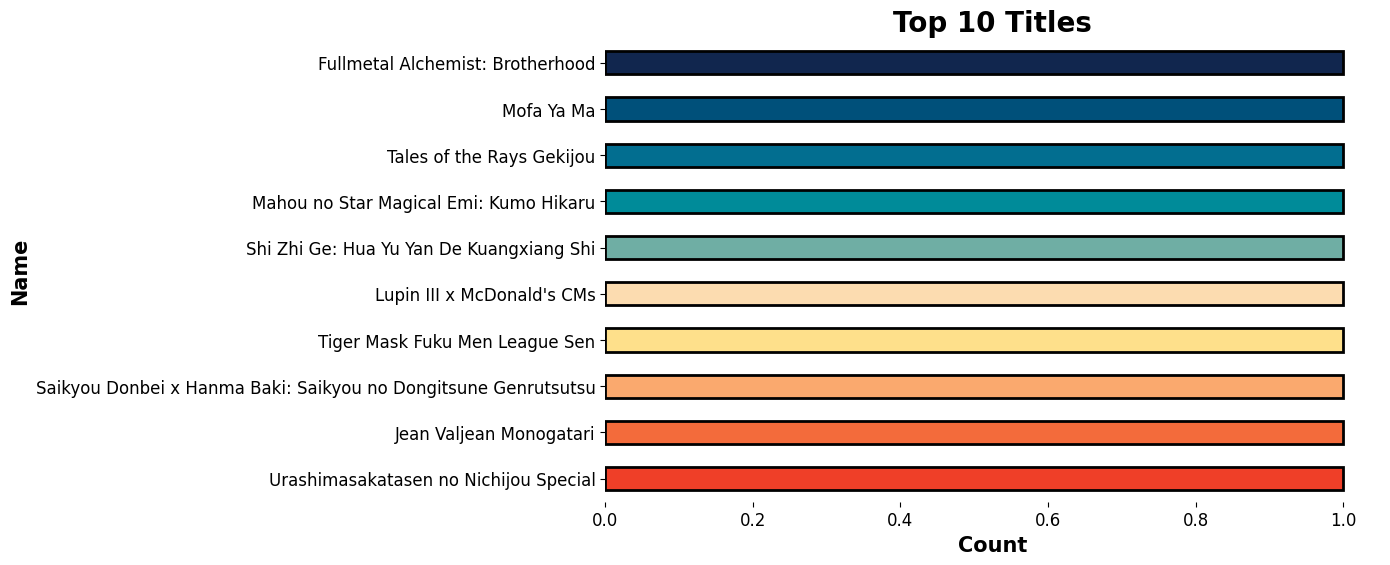

In [ ]:
top_10_titles = anime_df['Name'].value_counts().head(10)

color = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]

top_10_titles.plot(kind='bar', figsize=(10, 6), color=color, linewidth=2, edgecolor='k')
plt.title('Top 10 Titles', fontsize=20, color='k', weight='bold')
plt.xlabel('Count', fontsize=15, weight='bold')
plt.ylabel('Name', fontsize=15, weight='bold')
plt.tick_params(labelsize=12)
plt.gca().invert_yaxis()

sns.despine(left=True, bottom=True)
plt.show()

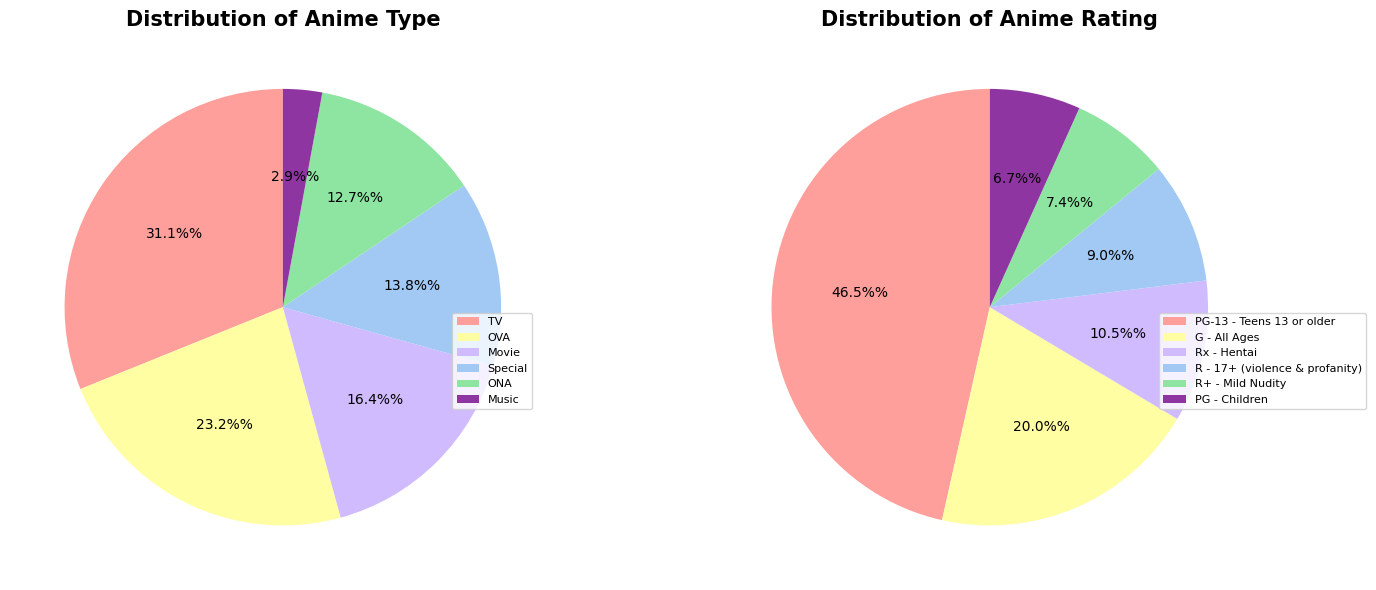

In [133]:
# status_counts = anime_df['Type'].value_counts()

# # Plotting the pie chart
# plt.figure(figsize=(6, 6))
# colors = ['#ff9f9b', '#fffea3', '#d0bbff', '#a1c9f4', '#8de5a1', '#8e35a1']
# plt.pie(status_counts, autopct=lambda pct: f'{pct:.1f}%%' if pct >= 1 else '', colors=colors, startangle=90)
# plt.title('Distribution of Anime Type', fontsize=15, fontweight='bold')
# plt.legend(status_counts.index, fontsize=12)
# plt.show()


# # Tạo figure và các trục subplot
# fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 hàng, 2 cột

# # Biểu đồ thanh (Bar chart)
# filtered_anime_studios = anime_df[anime_df['Studios'] != 'UNKNOWN']
# top_10_studios = filtered_anime_studios['Studios'].value_counts().head(10)
# color = ["#11264e", "#00507A", "#026e90", "#008b99", "#6faea4", 
#          "#fcdcb0", "#FEE08B", "#faa96e", "#f36b3b", "#ef3f28", "#CC0028"]

# top_10_studios.plot(kind='barh', ax=axes[0], color=color, linewidth=2, edgecolor='k')
# axes[0].set_title('Top 10 Studios', fontsize=20, color='k', weight='bold')
# axes[0].set_xlabel('Count', fontsize=15, weight='bold')
# axes[0].set_ylabel('Name', fontsize=15, weight='bold')
# axes[0].tick_params(labelsize=12)
# axes[0].invert_yaxis()
# sns.despine(left=True, bottom=True, ax=axes[0])

# # Biểu đồ tròn (Pie chart)
# status_counts = anime_df['Rating'].value_counts()
# pie_colors = ['#ff9f9b', '#fffea3', '#d0bbff', '#a1c9f4', '#8de5a1', '#8e35a1']
# axes[1].pie(status_counts, autopct=lambda pct: f'{pct:.1f}%%' if pct >= 1 else '', 
#             colors=pie_colors, startangle=90)
# axes[1].set_title('Distribution of Anime Rating', fontsize=15, fontweight='bold')
# axes[1].legend(status_counts.index, fontsize=8, loc='upper left', bbox_to_anchor=(0.8, 0.5))

# # Điều chỉnh layout
# plt.tight_layout()
# plt.show()

# Tạo figure và các trục subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 hàng, 2 cột

# Biểu đồ tròn (Pie chart)
status_counts = anime_df['Type'].value_counts()
pie_colors = ['#ff9f9b', '#fffea3', '#d0bbff', '#a1c9f4', '#8de5a1', '#8e35a1']
axes[0].pie(status_counts, autopct=lambda pct: f'{pct:.1f}%%' if pct >= 1 else '', 
            colors=pie_colors, startangle=90)
axes[0].set_title('Distribution of Anime Type', fontsize=15, fontweight='bold')
axes[0].legend(status_counts.index, fontsize=8, loc='upper left', bbox_to_anchor=(0.8, 0.5))


# Biểu đồ tròn (Pie chart)
status_counts = anime_df['Rating'].value_counts()
pie_colors = ['#ff9f9b', '#fffea3', '#d0bbff', '#a1c9f4', '#8de5a1', '#8e35a1']
axes[1].pie(status_counts, autopct=lambda pct: f'{pct:.1f}%%' if pct >= 1 else '', 
            colors=pie_colors, startangle=90)
axes[1].set_title('Distribution of Anime Rating', fontsize=15, fontweight='bold')
axes[1].legend(status_counts.index, fontsize=8, loc='upper left', bbox_to_anchor=(0.8, 0.5))

# Điều chỉnh layout
plt.tight_layout()
plt.show()


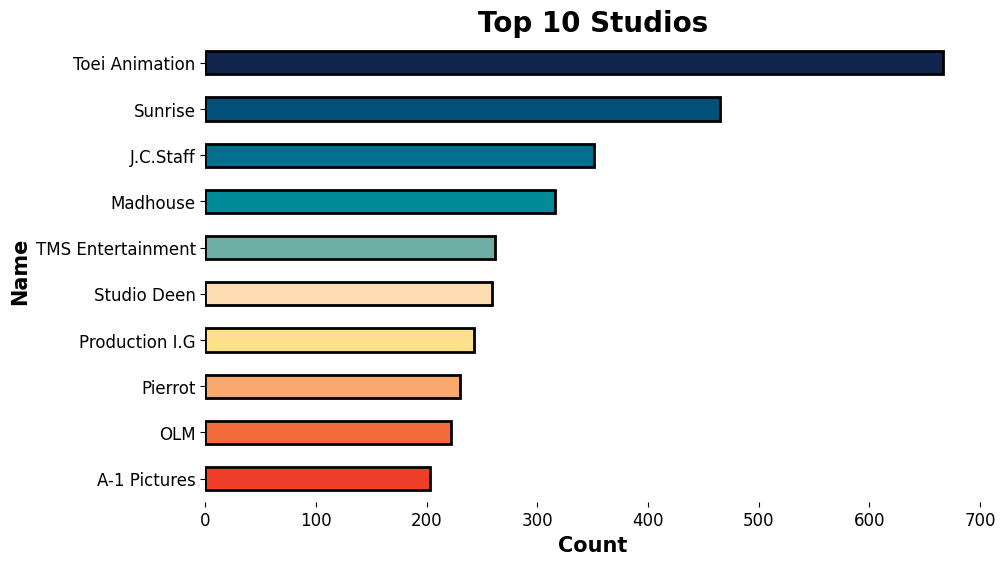

In [ ]:
# Loại bỏ các giá trị 'Unknown' trong cột 'Studios'
filtered_anime_studios = anime_df[anime_df['Studios'] != 'UNKNOWN']

# Lấy top 10 studios
top_10_studios = filtered_anime_studios['Studios'].value_counts().head(10)

color = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]

top_10_studios.plot(kind='barh', figsize=(10, 6), color=color, linewidth=2, edgecolor='k')
plt.title('Top 10 Studios', fontsize=20, color='k', weight='bold')
plt.xlabel('Count', fontsize=15, weight='bold')
plt.ylabel('Name', fontsize=15, weight='bold')
plt.tick_params(labelsize=12)
plt.gca().invert_yaxis()

sns.despine(left=True, bottom=True)
plt.show()

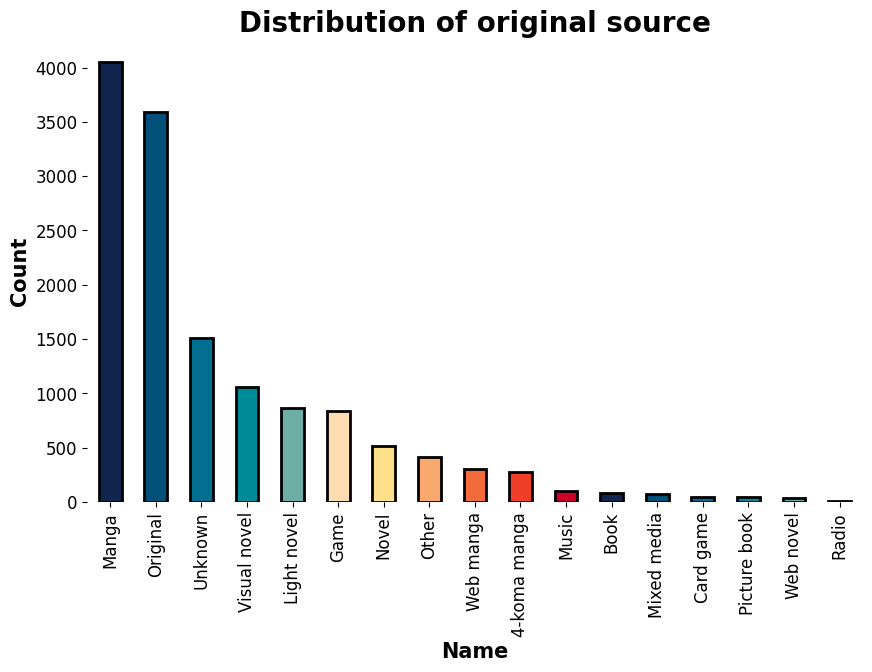

In [128]:
top_10_sources = anime_df['Source'].value_counts()

color = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]

# Tạo biểu đồ dạng cột đứng
top_10_sources.plot(kind='bar', figsize=(10, 6), color=color, linewidth=2, edgecolor='k')

# Tùy chỉnh biểu đồ
plt.title('Distribution of original source', fontsize=20, color='k', weight='bold')
plt.xlabel('Name', fontsize=15, weight='bold')  # Trục x giờ là Name
plt.ylabel('Count', fontsize=15, weight='bold')  # Trục y giờ là Count
plt.tick_params(labelsize=12)

sns.despine(left=True, bottom=True)
plt.show()

**Xem xét các thuộc tính có dữ liệu dạng mô tả là: `Synopsis`** 

**Xem xét các thuộc tính có nhiều giá trị là: `Genres`, `Producers`** 

In [134]:
# Chuyển đổi dữ liệu từ chuỗi thành list cho các cột 'Genres' và 'Producers'
anime_df['Genres'] = anime_df['Genres'].str.split(', ')
anime_df['Producers'] = anime_df['Producers'].str.split(', ')

# Kiểm tra kết quả
print(anime_df[['Genres', 'Producers']].head())

                                Genres  \
0  [Action, Adventure, Drama, Fantasy]   
1            [Drama, Sci-Fi, Suspense]   
2         [Action, Adventure, Fantasy]   
3             [Action, Comedy, Sci-Fi]   
4                      [Action, Drama]   

                                                                                                             Producers  
0                                                 [Aniplex, Square Enix, Mainichi Broadcasting System, Studio Moriken]  
1                    [Frontier Works, Media Factory, Kadokawa Shoten, Movic, AT-X, Kadokawa Pictures Japan, Nitroplus]  
2                                                                                [TV Tokyo, Aniplex, Dentsu, Shueisha]  
3                                                                                          [TV Tokyo, Aniplex, Dentsu]  
4  [Production I.G, Dentsu, Mainichi Broadcasting System, Pony Canyon, Kodansha, Techno Sound, Pony Canyon Enterprise]  


In [136]:
anime_df.head(1)

,Name,Score,Genres,Synopsis,Type,Episodes,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members,Released date,Completed date
0,Fullmetal Alchemist: Brotherhood,9.1,"[Action, Adventure, Drama, Fantasy]","After a horrific alchemy experiment goes wrong in the Elric household, brothers Edward and Alphonse are left in a catastrophic new reality. Ignoring the alchemical principle banning human transmutation, the boys attempted to bring their recently deceased mother back to life. Instead, they suffered brutal personal loss: Alphonse's body disintegrated while Edward lost a leg and then sacrificed an arm to keep Alphonse's soul in the physical realm by binding it to a hulking suit of armor.\n\nThe brothers are rescued by their neighbor Pinako Rockbell and her granddaughter Winry. Known as a bio-mechanical engineering prodigy, Winry creates prosthetic limbs for Edward by utilizing ""automail,"" a tough, versatile metal used in robots and combat armor. After years of training, the Elric brothers set off on a quest to restore their bodies by locating the Philosopher's Stone—a powerful gem that allows an alchemist to defy the traditional laws of Equivalent Exchange.\n\nAs Edward becomes an infamous alchemist and gains the nickname ""Fullmetal,"" the boys' journey embroils them in a growing conspiracy that threatens the fate of the world.",TV,64.0,"[Aniplex, Square Enix, Mainichi Broadcasting System, Studio Moriken]",Bones,Manga,24.0,R - 17+ (violence & profanity),1,3,217606,2020030,3176556,2009-04-05,2010-07-04


In [139]:
list_col_dist_df = pd.DataFrame({'Genres': [.0] * 3,
                                 'Producers': [.0] * 3},
                                index=['Missing_ratio', 'Num_diff_vals', 'Distribution'], dtype=object)

# Concatenate and find unique values
list_col_dist_df.loc['Distribution'] = anime_df[['Genres', 'Producers']].apply(lambda col: pd.Series(col.sum()).value_counts().to_dict())

# Calculate the number of different values
list_col_dist_df.loc['Num_diff_vals'] = list_col_dist_df.loc['Distribution'].apply(len)

list_col_dist_df.loc['Missing_ratio'] = anime_df[['Genres', 'Producers']].apply(lambda col: (col.apply(lambda x: len(x) == 0)).mean() * 100)

list_col_dist_df

,Genres,Producers
Missing_ratio,0.0,0.0
Num_diff_vals,21,1386
Distribution,"{'Comedy': 5039, 'Action': 3925, 'Fantasy': 3265, 'Adventure': 2648, 'Sci-Fi': 2438, 'Drama': 2189, 'Romance': 1826, 'Hentai': 1464, 'Supernatural': 1268, 'Slice of Life': 1173, 'Ecchi': 766, 'Mystery': 748, 'Sports': 558, 'Avant Garde': 467, 'Horror': 445, 'Award Winning': 213, 'Suspense': 187, 'Boys Love': 148, 'Gourmet': 106, 'Girls Love': 103, 'Erotica': 43}","{'UNKNOWN': 5018, 'Aniplex': 536, 'TV Tokyo': 520, 'Lantis': 432, 'Bandai Visual': 402, 'Movic': 388, 'AT-X': 376, 'Dentsu': 349, 'Pony Canyon': 343, 'Sotsu': 305, 'Fuji TV': 301, 'Kadokawa': 291, 'Kodansha': 290, 'KlockWorx': 283, 'Shueisha': 276, 'Pink Pineapple': 271, 'Mainichi Broadcasting System': 250, 'TBS': 218, 'Kadokawa Shoten': 209, 'DAX Production': 200, 'NHK': 187, 'Genco': 180, 'MS Pictures': 164, 'TV Asahi': 158, 'Tokyo MX': 155, 'Starchild Records': 155, 'Media Factory': 150, 'flying DOG': 150, 'Shogakukan-Shueisha Productions': 150, 'Nihon Ad Systems': 149, 'VAP': 147, 'Frontier Works': 138, 'Sony Music Entertainment': 137, 'Toho': 136, 'bilibili': 136, 'Square Enix': 134, 'Tencent Penguin Pictures': 132, 'BS11': 132, 'Nippon Columbia': 130, 'Nippon Television Network': 129, 'TOHO animation': 124, 'Magic Capsule': 124, 'Shochiku': 123, 'Milky Animation Label': 120, 'Sanrio': 117, 'Half H.P Studio': 117, 'Showgate': 116, 'Warner Bros. Japan': 113, 'Geneon Universal Entertainment': 113, 'Mediabank': 99, 'Hakuhodo DY Music & Pictures': 97, 'Shogakukan': 97, 'Avex Pictures': 96, 'Kadokawa Media House': 94, 'Bushiroad': 90, 'Good Smile Company': 90, 'Studio Jack': 89, 'Tohokushinsha Film Corporation': 88, 'NBCUniversal Entertainment Japan': 88, 'Digital Works': 87, 'King Records': 87, 'Crunchyroll': 87, 'Studio Mausu': 86, 'Yomiuri Telecasting': 86, 'Production I.G': 84, 'Asatsu DK': 78, 'Asmik Ace': 77, 'BS Fuji': 77, 'Lune Pictures': 77, 'Bandai': 77, 'TV Tokyo Music': 76, 'Bandai Namco Arts': 75, 'Rakuonsha': 71, 'Yomiko Advertising': 71, 'Docomo Anime Store': 71, 'Victor Entertainment': 71, 'ABC Animation': 67, 'ASCII Media Works': 67, 'Pioneer LDC': 65, 'Bandai Namco Entertainment': 63, 'Marvelous': 60, 'AIC': 60, 'WOWOW': 59, 'Sony Music Communications': 58, 'Avex Entertainment': 57, 'Tokyo Movie Shinsha': 57, 'Dynamic Planning': 57, 'Tencent Animation & Comics': 54, 'Sammy': 54, 'Mary Jane': 54, 'Imagine': 54, 'MAGES.': 53, 'Sega': 53, 'KSS': 53, 'Yomiuri TV Enterprise': 52, 'Glovision': 50, 'Memory-Tech': 50, 'Nagoya Broadcasting Network': 49, 'Asahi Broadcasting': 47, 'Happinet Pictures': 46, ...}"


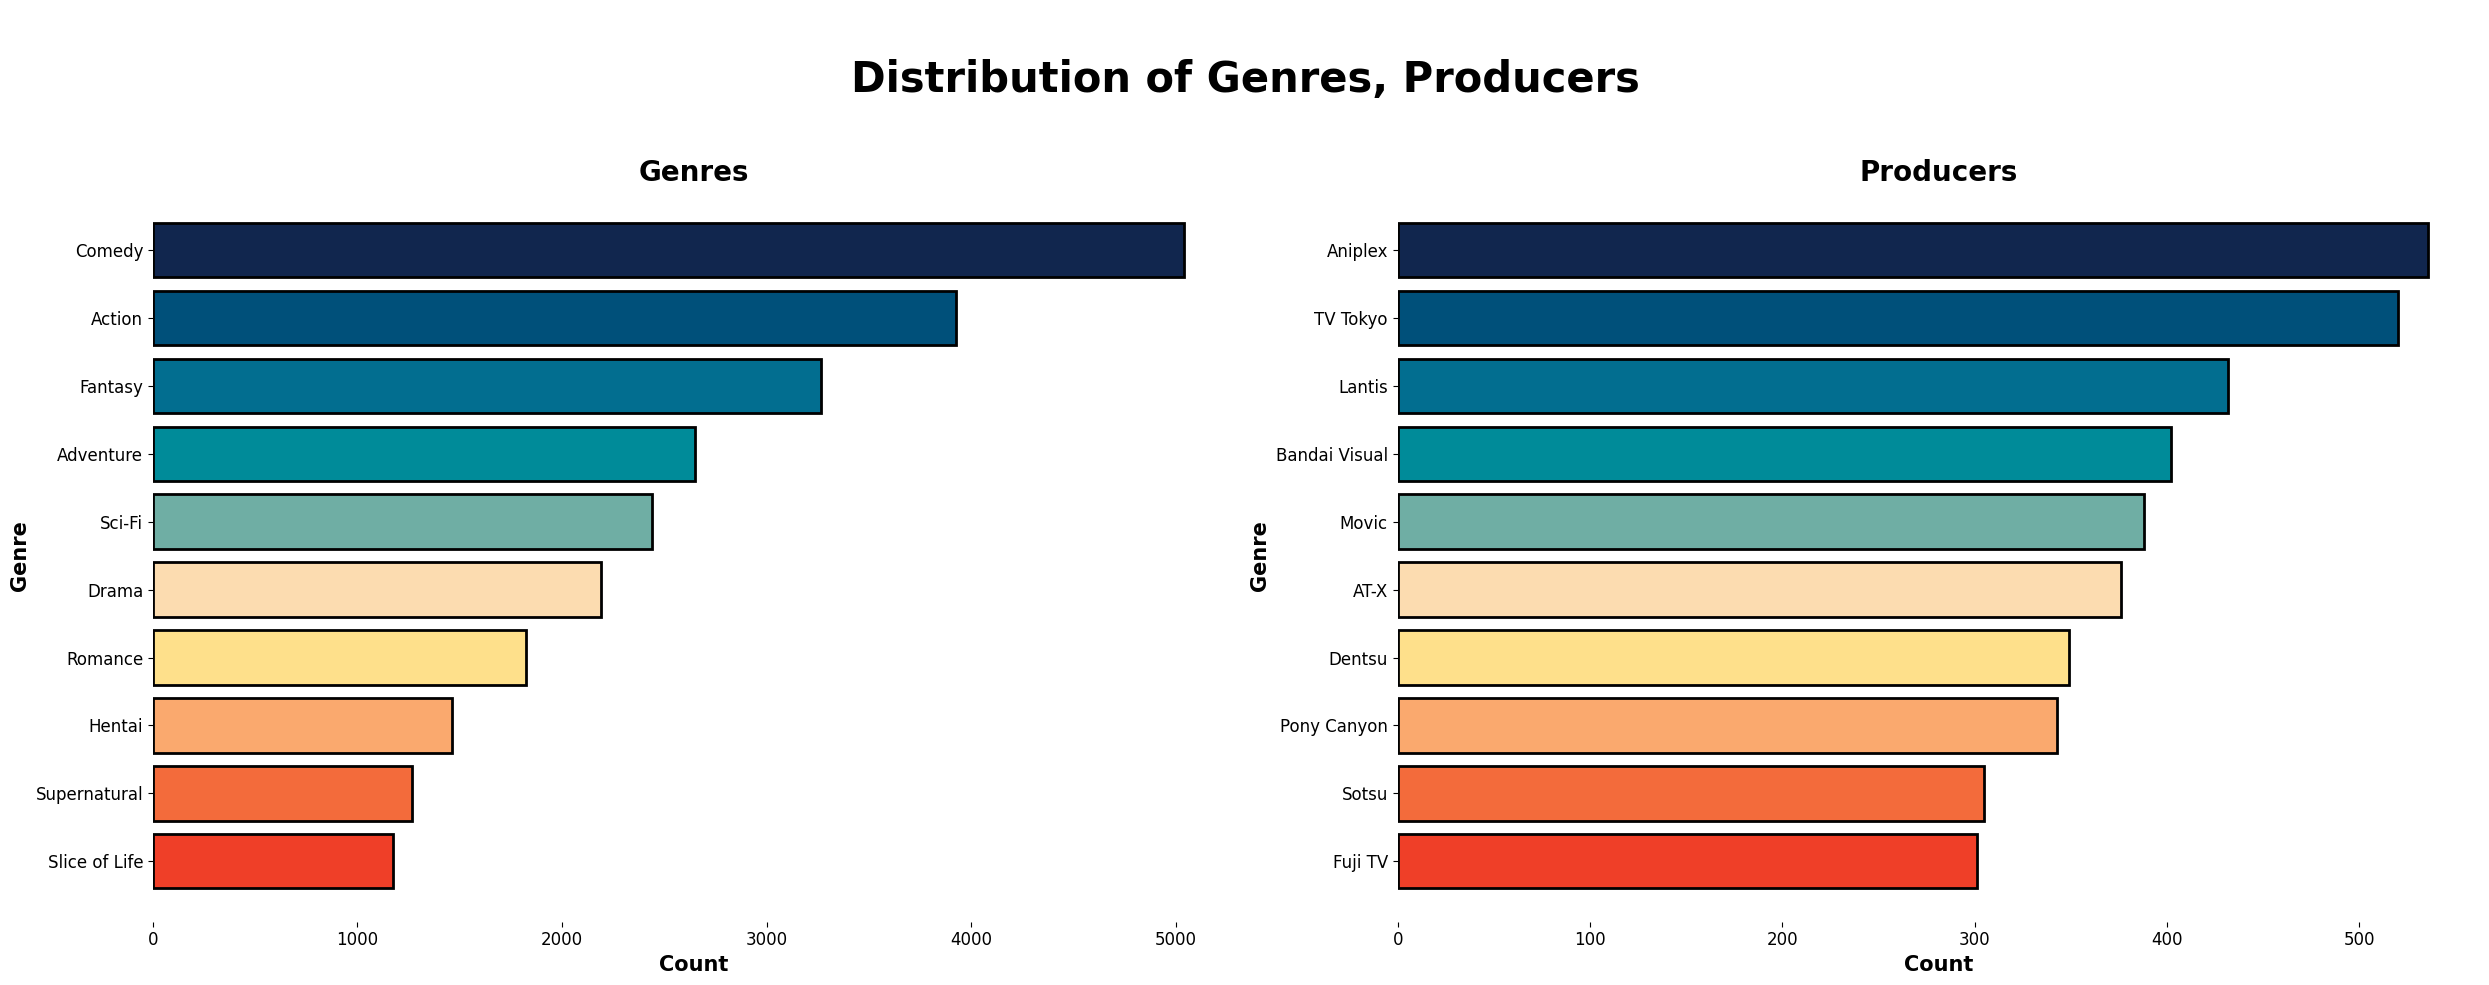

In [148]:
# Visualize the distribution of genres and themes
genres = anime_df['Genres'].explode()
genres_counts = genres.value_counts().head(10)

producers = anime_df['Producers'].explode()
# Loại giá trị UNKNOWN để đưa ra kết quả trực quan tốt cho 'Producers'
producers = producers[producers != 'UNKNOWN']
producers_counts = producers.value_counts().head(10)

fig, ax = plt.subplots(1, 2, figsize=(25, 10))
fig.suptitle('\nDistribution of Genres, Producers\n', fontsize=30, fontweight='bold')
for i, (col, counts) in enumerate(zip(['Genres', 'Producers'], [genres_counts, producers_counts])):
    ax[i].barh(counts.index, counts, color=color, linewidth=2, edgecolor='k')
    ax[i].set_title(col, fontsize=20, fontweight='bold')
    ax[i].set_xlabel('Count', fontsize=15, weight='bold')
    ax[i].set_ylabel('Genre', fontsize=15, weight='bold')
    ax[i].tick_params(labelsize=12)
    ax[i].invert_yaxis()

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## 4. TRỰC QUAN HÓA MỘT VÀI MỐI QUAN HỆ GIỮA CÁC THUỘC TÍNH

Nhóm sẽ thực hiện trực quan hóa một vài chủ đề đơn giản để khám phá một vài mối quan hệ giữa các thuộc tính:
- Top 10 anime được yêu thích nhất
- Top 10 anime có điểm số cao nhất
- Top 10 anime có thời gian phát hành lâu nhất

## 5. KẾT LUẬN